# CSCI 184: Applied Machine Learning
# Homework #3
# Patrick, Arjun, Andrew

## 1) [60 points] Predicting Purchases from Social Network Ads

### 1. Load the dataset from ‘Social_Network_Ads.csv’ into a pandas DataFrame and print it along with its shape. ‘Purchased’ is the target variable.

In [126]:
import csv

socnet = pd.read_csv('Social_Network_Ads.csv') #load the dataset
socnet_df = pd.DataFrame(data=socnet) #load it in as a dataframe
print("Shape of dataset: ", socnet_df.shape) #print the shape
socnet_df #print the dataframe

Shape of dataset:  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### 2. Print the column names and the data type of each column.

In [127]:
print("Column names: ", socnet_df.columns) #print names of the columns
print("Data Types: ")
print(socnet_df.dtypes)

Column names:  Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Data Types: 
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


### 3. Normalize the features in the input dataset.

In [128]:
# separate features and target variable
target = socnet_df['Purchased']
del socnet_df['Purchased']

# Change the string feature into int for normalization
Gender_dict = {'Male': 0,'Female': 1} 
socnet_df['Gender'] = [Gender_dict[value] for value in socnet_df['Gender']] 
# Now we can normalize the input features
# create funciton to normalize each column
def normalizer(dataf): 
    return_df = dataf.copy() #make a copy of the original
    for column in dataf: #for every feature
        if column != 'User ID': #for all the columns other than the userId column
            max_ = dataf[column].max() #find the max
            min_ = dataf[column].min() #find the min
            return_df[column] = (dataf[column] - min_)/(max_ - min_) #make the column normalized
        else: 
            return_df[column] = dataf[column]
    return return_df #return the normalized dataframe

# call the function on the dataset
socnet_norm_df = normalizer(socnet_df)


In [129]:
socnet_norm_df #print the normalized datafram

,User ID,Gender,Age,EstimatedSalary
0,15624510,0.0,0.023810,0.029630
1,15810944,0.0,0.404762,0.037037
2,15668575,1.0,0.190476,0.207407
3,15603246,1.0,0.214286,0.311111
4,15804002,0.0,0.023810,0.451852
...,...,...,...,...
395,15691863,1.0,0.666667,0.192593
396,15706071,0.0,0.785714,0.059259
397,15654296,1.0,0.761905,0.037037
398,15755018,0.0,0.428571,0.133333


### 4. Perform Random Forest Classification using sklearn. Make sure to enable bootstrap and oob_score

In [130]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

Y = target #set the Y as 'Purchased' column
X = socnet_norm_df #set the X as the normalized dataframe
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #split into test/train with 80-20 train-test

rf_socnet = RandomForestClassifier(bootstrap=True, oob_score=True) #create model
rf_socnet.fit(X_train, Y_train) #Fit the model with the train data

Y_predict = rf_socnet.predict(X_test) #test the model
print('Score: ', rf_socnet.score(X_test, Y_test))

Score:  0.925


### 5. Find the oob error for different numbers of trees. Figure out which parameter sets the number of trees.

In [131]:
# Create a funciton that will run a Random Forest Classification model with different amount of trees
def RF_model(n_trees, X_tr, X_te, Y_tr, Y_te, tree_count_list, oob_score_list): 
    rf_socnet = RandomForestClassifier(n_estimators=n_trees, bootstrap=True, oob_score=True) #create model
    rf_socnet.fit(X_tr, Y_tr) #Fit the model with the train data
    
    tree_count_list.append(n_trees) #add the amount of trees to a list
    oob_score_list.append(rf_socnet.oob_score_) #add the oob score to a list
    return tree_count_list, oob_score_list # return the lists
    
tree_num = [] #create empty list for tree count
oob_sc = [] #create empty list for oob scores 

#loop through amount of trees from 17 to 150. This is because we got errors for OOB scores of less than 17 trees
for tr_amount in range(16, 150): 
    tree_num, oob_sc = RF_model(tr_amount, X_train, X_test, Y_train, Y_test, tree_num, oob_sc)


/Users/connorcallahan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/connorcallahan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [132]:
oob_tree_num_df = pd.DataFrame(columns=['TreeAmount', 'OOB Score'])
oob_tree_num_df['TreeAmount'] = tree_num
oob_tree_num_df['OOB Score'] = oob_sc
oob_tree_num_df

,TreeAmount,OOB Score
0,16,0.871429
1,17,0.860714
2,18,0.885714
3,19,0.889286
4,20,0.900000
...,...,...
129,145,0.900000
130,146,0.889286
131,147,0.892857
132,148,0.900000


### 6. Plot the oob error vs number of trees. (Similar to example in class) and find the number of trees with the lowest error. If multiple, report all.

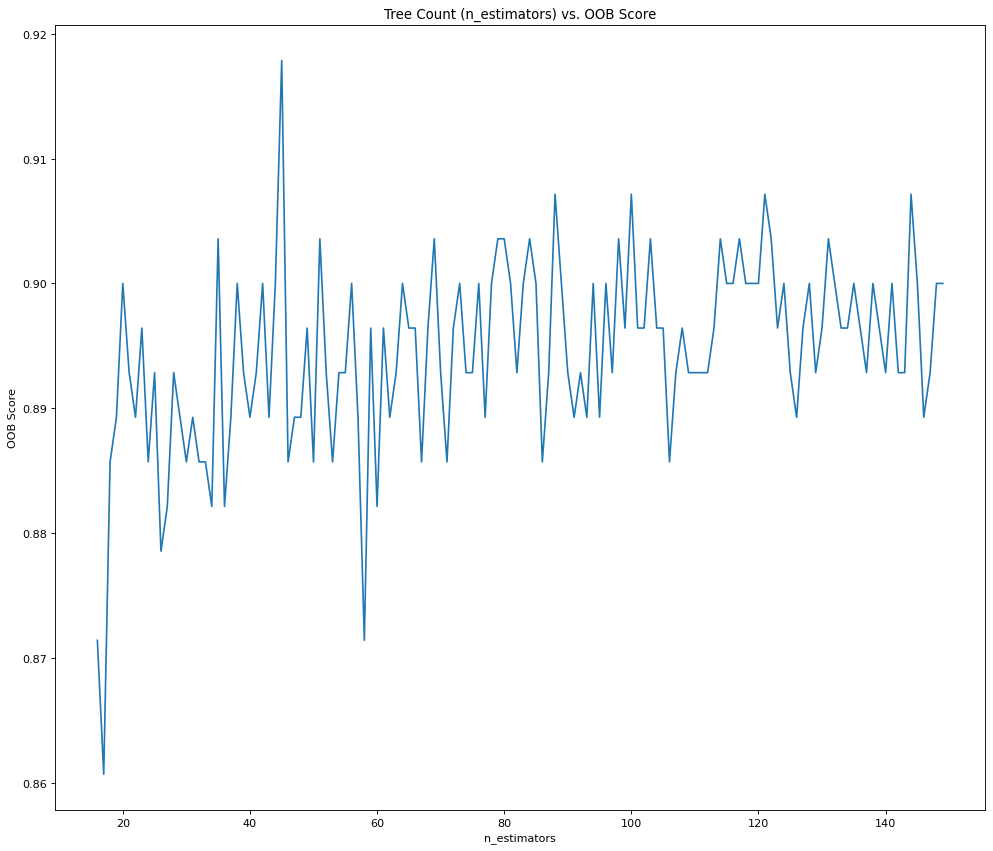

In [133]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

X = oob_tree_num_df['TreeAmount']
Y = oob_tree_num_df['OOB Score']
  
figure(figsize=(15, 13), dpi=80)

plt.plot(X, Y)
plt.title('Tree Count (n_estimators) vs. OOB Score')
plt.xlabel('n_estimators')
plt.ylabel('OOB Score')
plt.show()